In [58]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from PIL import *
import pandas as pd
import konlpy

In [59]:
df = pd.read_csv("C:/Sosang/3.뉴스크롤링/뉴스데이터.csv", encoding='utf-8')
df = df.drop("Unnamed: 0", axis=1)
df.head()
#wc = df.set_index("title").to_dict()["count"]

,site,site_des
0,https://n.news.naver.com/mnews/article/052/000...,\n\n\t\t\t대구시가 종업원을 두지 않고 혼자 일하는 1인 자영업자에게 이번 ...
1,https://n.news.naver.com/mnews/article/008/000...,"\n\n\n\n\n\n소진공이 대구시, 근로복지공단 등과 자영업자 고용보험료 지원을..."
2,https://n.news.naver.com/mnews/article/408/000...,NaN
3,https://n.news.naver.com/mnews/article/002/000...,\n\n정부 지원 포함 최대 80% 지원대구시가 1인 자영업자를 대상으로 고용보험료...
4,https://n.news.naver.com/mnews/article/018/000...,\n\n대구시·대구신보·근로복지공단과 업무협약 체결1인 소상공인에 최대 80% 지원...


In [60]:
df['site_des']=df['site_des'].str.replace('[^가-힣]',' ', regex=True)
df = df.dropna()
df

,site,site_des
0,https://n.news.naver.com/mnews/article/052/000...,대구시가 종업원을 두지 않고 혼자 일하는 인 자영업자에게 이번 달부터 고...
1,https://n.news.naver.com/mnews/article/008/000...,소진공이 대구시 근로복지공단 등과 자영업자 고용보험료 지원을 위한 업무...
3,https://n.news.naver.com/mnews/article/002/000...,정부 지원 포함 최대 지원대구시가 인 자영업자를 대상으로 고용보험료 일...
4,https://n.news.naver.com/mnews/article/018/000...,대구시 대구신보 근로복지공단과 업무협약 체결 인 소상공인에 최대 지원 자...
5,https://n.news.naver.com/mnews/article/014/000...,지난 일 대구 산격청사에서 진행된 자영업자 고용보험료 지원 업무협약...
6,https://n.news.naver.com/mnews/article/421/000...,대구광역시 인 소상공인 최대 지원받아소진공 만 명 소상공인에...
7,https://n.news.naver.com/mnews/article/087/000...,매일 강릉 오는 방문객만 만여명 실제 인구의 달해강원연구원 원주...
8,https://n.news.naver.com/mnews/article/047/000...,정부 지원 외 추가 지원해 최대 까지 년 간 지원 받을 수 있어 ...
9,https://n.news.naver.com/mnews/article/031/000...,최대 년간 지원 정부 지원액 더하면 최대 지원대구광역시 시장 홍준표 ...
10,https://n.news.naver.com/mnews/article/088/000...,시 대구신보 근로복지공단 소상공인시장진흥공단 업무 협약정부 고용보험료 ...


In [61]:
kkma = konlpy.tag.Kkma()

nouns = df['site_des'].apply(kkma.nouns)
nouns

0     [대구, 대구시가, 시가, 종업원, 혼자, 인, 자영업자, 이번, 달, 고용, 고용...
1     [소진, 소진공이, 공이, 대구시, 근로, 근로복지공단, 복지, 공단, 등, 자영,...
3     [정부, 지원, 포함, 최대, 지원대구시가, 대구, 시가, 자영, 자영업자, 업자,...
4     [대구시, 대구, 대구신보, 신보, 근로, 근로복지공단, 복지, 공단, 업무, 업무...
5     [일, 대구, 산, 산격청사, 격, 청사, 진행, 자영, 자영업자, 업자, 고용, ...
6     [대구, 대구광역시, 광역, 시, 소, 소상공인, 상공인, 최대, 지원, 소진, 소...
7     [강릉, 방문객, 여명, 실제, 인구, 강원, 강원연구원, 연구원, 원주민, 젠, ...
8     [정부, 지원, 외, 추가, 최대, 년, 간, 수, 대구시, 일, 대구, 대구신용보...
9     [최대, 년, 년간, 간, 지원, 정부, 지원액, 액, 지원대구광역시, 대구, 대구...
10    [시, 대구, 대구신보, 신보, 근로, 근로복지공단, 복지, 공단, 소, 소상공인시...
11    [최대, 년, 년간, 간, 정부, 지원, 지원액, 액, 대구, 뉴, 뉴시스, 시스,...
12    [대구, 대구시청, 시청, 산, 산격청사, 격, 청사, 전경, 사진, 사진제공, 제...
13    [대구시, 제공, 자영, 자영업자, 업자, 사회, 안전망, 강화, 고용, 보험료, ...
14    [서울, 을지, 카드, 본사, 전경, 데일리, 데일리안, 안, 부, 부광우, 광우,...
15    [재테크, 노하우, 분, 머니, 머니쇼, 쇼, 하우, 하우머니, 김, 김상훈, 상훈...
16    [물가, 계층, 수혜, 피해자, 현실, 직시, 이근, 이근면, 면, 인사, 인사혁신...
17    [백약, 무효, 라, 라던, 던, 자영업, 시장, 배민, 효과, 이유, 사진, 게,...
18    [강릉, 태백, 태백시, 시, 인구, 감소세, 지난달, 월, 말, 현재, 만

In [62]:
nouns = nouns.explode()
nouns

0       대구
0     대구시가
0       시가
0      종업원
0       혼자
      ... 
41      차단
41      조치
41      신속
41      권유
41      조언
Name: site_des, Length: 8137, dtype: object

In [63]:
df_word = pd.DataFrame({'word':nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word

,word,count
0,대구,2
0,대구시가,4
0,시가,2
0,종업원,3
0,혼자,2
...,...,...
41,차단,2
41,조치,2
41,신속,2
41,권유,2


In [64]:
df_word = df_word.groupby('word',as_index=False).count().sort_values('count', ascending=False)
df_word

,word,count
2618,폐업,40
1951,자영업자,39
2280,지원,25
1673,올해,25
631,대상,24
...,...,...
1134,사이더,1
1132,사유,1
1131,사용처,1
1130,사용자단체,1


In [65]:
df_word = df_word.iloc[3:, :]
df_word.head(10)

,word,count
1673,올해,25
631,대상,24
1017,부담,24
1713,운영,22
1438,시장,21
2097,정부,20
2446,추가,20
167,경우,19
1633,영세,19
420,급여,18


In [66]:
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

{'올해': 25,
 '대상': 24,
 '부담': 24,
 '운영': 22,
 '시장': 21,
 '정부': 20,
 '추가': 20,
 '경우': 19,
 '영세': 19,
 '급여': 18,
 '기간': 18,
 '업자': 18,
 '근로': 18,
 '전체': 18,
 '이상': 18,
 '미만': 17,
 '보험': 17,
 '최저': 17,
 '제도': 17,
 '상공인': 16,
 '경제': 16,
 '기준': 16,
 '기업': 16,
 '기관': 15,
 '최대': 15,
 '대비': 15,
 '경기': 15,
 '소상공인': 15,
 '뉴스': 15,
 '복지': 15,
 '자영': 15,
 '고용': 15,
 '사업': 14,
 '실업': 14,
 '혜택': 14,
 '실업급여': 14,
 '청사': 14,
 '분석': 14,
 '지난해': 14,
 '업무': 14,
 '강화': 14,
 '방문': 13,
 '영업': 13,
 '중소': 13,
 '필요': 13,
 '만원': 13,
 '보험료': 13,
 '개월': 13,
 '노력': 13,
 '이번': 13,
 '제공': 13,
 '정책': 13,
 '기자': 13,
 '센터': 13,
 '대구': 13,
 '고용보험': 13,
 '때문': 13,
 '확인': 12,
 '개발': 12,
 '가입': 12,
 '납부': 12,
 '수준': 12,
 '재단': 12,
 '계획': 12,
 '상황': 12,
 '확대': 12,
 '고용보험료': 12,
 '협력': 12,
 '신청': 12,
 '신용': 12,
 '직업': 12,
 '동안': 12,
 '홍보': 12,
 '등급': 12,
 '감소': 12,
 '공단': 11,
 '사진': 11,
 '사회': 11,
 '산업': 11,
 '조사': 11,
 '가운데': 11,
 '보증': 11,
 '진흥': 11,
 '추진': 11,
 '대구신용보증재단': 11,
 '지역': 11,
 '매출': 11,
 '정도': 10,
 '위기': 10,
 '

In [67]:
cand_mask=np.array(Image.open("C:/Sosang/3.뉴스크롤링/circle.jpg"))

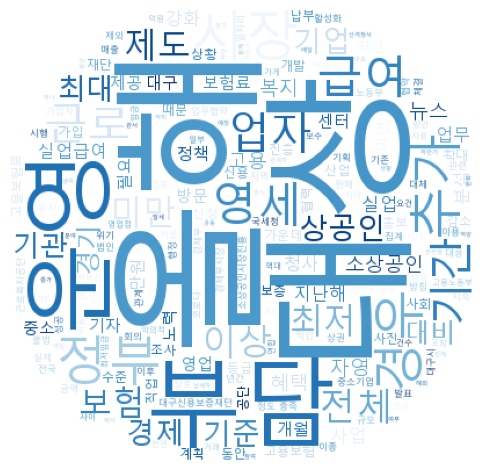

In [68]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
# wc = WordCloud(random_state = 123, font_path = 'Malgun Gothic', width = 400,
#               height = 400, background_color = 'white')



wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Blues_r', # 글씨색은 빨간색으로     # palettes = ['spring', 'summer', 'seismic','PuBu']
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(dic_word)

# img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (6, 6)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(wordcloud) # 결과 보여주기
plt.savefig('워드클라우드 이미지') # 파일 저장